In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
import re 
import pandas as pd
import string

from tensorflow import keras

from sklearn.model_selection import train_test_split
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, GRU, LSTM, Bidirectional, Dropout, GlobalMaxPool1D, SpatialDropout1D, Conv1D, MaxPooling1D
from keras.initializers import Constant
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam, SGD

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

# from transformers import MarianMTModel, MarianTokenizer
# import mosestokenizer

In [3]:
# nltk.download('stopwords')
# nltk.download('punkt')

In [4]:
embeddings_index = {}
embedding_dim = 300
GLOVE_DIR = "C:\\Users\\Abhinav\\Desktop\\Project Final"
f = open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'), encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [5]:
train1 = pd.read_csv('toxic.csv')
train1 = train1[0:21092]
train1.shape

(21092, 2)

In [6]:
train = pd.read_csv('dataset.csv')
# train0 = train[train['toxic'] == 0][0:64574]
train0 = train[train['toxic'] == 0][0:31639]
train0.shape
# 64574

(31639, 3)

In [7]:
# train0 = pd.read_csv('nontoxic.csv')
# train0.shape

In [8]:
train = pd.concat([train1,train0],axis=0)
train = train.sample(frac=1)
train.head()

,comment_text,toxic,id
35102,"""\r\n This new link also clearly states that ""...",0,5dbc2b307a7355c3
16436,You are a gay homo.I hope you are surprised on...,1,NaN
4222,"It's got nothing to do with race, it's got eve...",1,NaN
16631,LOL Charging you with burning my britches isn'...,0,2bdb483795b74393
27716,"""\r\nOk, I added a paragraph about Native Amer...",0,4962aea6a57e8d18


In [8]:
train.shape

(52731, 3)

In [9]:
def preprocess(text):
#     try:
#         text = text.lower()
#         text_p = "".join([char for char in text if char not in string.punctuation])
#         words = word_tokenize(text_p)
#         stop_words = stopwords.words('english')
#         filtered_words = [word for word in words if word not in stop_words]
#         porter = PorterStemmer()
#         stemmed = [porter.stem(word) for word in filtered_words]   
#         return stemmed
#     except:
#         print(text)
#         return ""
    text = text.lower()
    text_p = "".join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text_p)
    stop_words = stopwords.words('english')
    filtered_words = [word for word in words if word not in stop_words]
    porter = PorterStemmer()
    stemmed = [porter.stem(word) for word in filtered_words]   
    return stemmed

#     return filtered_words

In [10]:
X_train = train['comment_text']
# X_test = test['comment_text']
y_train = train['toxic'].values
# y_test = test['toxic'].values

In [11]:
X_train.shape

(52731,)

In [12]:
X_train = X_train.map(preprocess)

In [13]:
# X_train_new = []
# for s in X_train:
#     X_train_new.append(preprocess(s))
# X_train = pd.Series(X_train_new)

In [14]:
max_length = 100

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)

X_train = pad_sequences(sequences, maxlen=max_length, padding='post')

In [15]:
# tokenizer_test = Tokenizer()
# tokenizer_test.fit_on_texts(X_test)
# sequences = tokenizer_test.texts_to_sequences(X_test)

# X_test = pad_sequences(sequences, maxlen=max_length, padding='post')

# sequences = tokenizer.texts_to_sequences(X_test)
# X_test = pad_sequences(sequences, maxlen=max_length, padding='post')

In [16]:
word_index_train = tokenizer.word_index 
vocab_train = len(tokenizer.word_index) + 1

In [17]:
word_index_train

{'articl': 1,
 'page': 2,
 'fuck': 3,
 'wikipedia': 4,
 'edit': 5,
 'like': 6,
 'use': 7,
 'dont': 8,
 'talk': 9,
 'one': 10,
 'go': 11,
 'would': 12,
 'pleas': 13,
 'know': 14,
 'delet': 15,
 'im': 16,
 'get': 17,
 'think': 18,
 'make': 19,
 'see': 20,
 'peopl': 21,
 'thank': 22,
 'sourc': 23,
 'time': 24,
 'block': 25,
 'suck': 26,
 'also': 27,
 'say': 28,
 'want': 29,
 'person': 30,
 'nigger': 31,
 'user': 32,
 'shit': 33,
 'need': 34,
 'remov': 35,
 'even': 36,
 'name': 37,
 'hi': 38,
 'look': 39,
 'vandal': 40,
 'good': 41,
 'inform': 42,
 'may': 43,
 'discuss': 44,
 'work': 45,
 'u': 46,
 'tri': 47,
 'link': 48,
 'chang': 49,
 'take': 50,
 'comment': 51,
 'thing': 52,
 'well': 53,
 'ass': 54,
 'way': 55,
 'stop': 56,
 'your': 57,
 'help': 58,
 'refer': 59,
 'right': 60,
 'hate': 61,
 'read': 62,
 'could': 63,
 'fact': 64,
 'ad': 65,
 'realli': 66,
 'first': 67,
 'editor': 68,
 'imag': 69,
 'call': 70,
 'question': 71,
 'point': 72,
 'reason': 73,
 'new': 74,
 'section': 75,
 'lis

In [18]:
X_train

array([[  289,   764,   231, ...,     0,     0,     0],
       [  250,     9,  1921, ...,     0,     0,     0],
       [  997,     8,    39, ...,     0,     0,     0],
       ...,
       [   60,    75,   884, ...,     0,     0,     0],
       [  282, 21916,  1413, ...,   235,    23,    35],
       [  320, 91979,   597, ...,     0,     0,     0]])

In [19]:
len(word_index_train)

91979

In [20]:
# X_test

In [21]:
embedding_matrix_train = np.zeros((len(word_index_train) + 1, embedding_dim))
for word, i in word_index_train.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_train[i] = embedding_vector

In [22]:
embedding_layer = Embedding(len(word_index_train) + 1,
                            embedding_dim,
                            weights=[embedding_matrix_train],
                            input_length=max_length,
                            trainable=False)

In [98]:
model = Sequential()
model.add(embedding_layer)
# model.add(Bidirectional(LSTM(60, return_sequences = True)))
model.add(GRU(60, return_sequences = True))
model.add(SpatialDropout1D(0.1))
model.add(GlobalMaxPool1D())
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          27594000  
_________________________________________________________________
gru_4 (GRU)                  (None, 100, 60)           65160     
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 100, 60)           0         
_________________________________________________________________
global_max_pooling1d_6 (Glob (None, 60)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                3050      
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [99]:
history = model.fit(X_train, y_train, batch_size=64, epochs=6, validation_split=0.2, verbose=1)

Epoch 1/6
660/660 [==============================] - 41s 62ms/step - loss: 0.3277 - accuracy: 0.8548 - val_loss: 0.2128 - val_accuracy: 0.9274
Epoch 2/6
660/660 [==============================] - 41s 62ms/step - loss: 0.2664 - accuracy: 0.8858 - val_loss: 0.1720 - val_accuracy: 0.9418
Epoch 3/6
660/660 [==============================] - 40s 61ms/step - loss: 0.2438 - accuracy: 0.8982 - val_loss: 0.3024 - val_accuracy: 0.8779
Epoch 4/6
660/660 [==============================] - 40s 60ms/step - loss: 0.2232 - accuracy: 0.9062 - val_loss: 0.2777 - val_accuracy: 0.8886
Epoch 5/6
660/660 [==============================] - 40s 61ms/step - loss: 0.2051 - accuracy: 0.9144 - val_loss: 0.2517 - val_accuracy: 0.9008
Epoch 6/6
660/660 [==============================] - 40s 60ms/step - loss: 0.1894 - accuracy: 0.9220 - val_loss: 0.3186 - val_accuracy: 0.8767


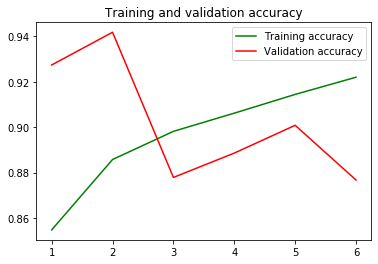

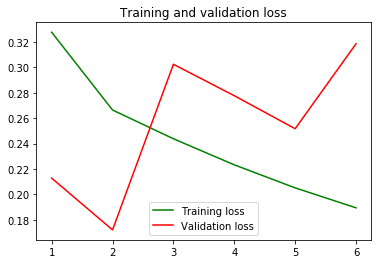

In [100]:
# Plotting the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [101]:
model2 = Sequential()
model2.add(embedding_layer)
# model.add(Bidirectional(LSTM(60, return_sequences = True)))
model2.add(LSTM(60, return_sequences = True))
model2.add(SpatialDropout1D(0.1))
model2.add(GlobalMaxPool1D())
model2.add(Dense(50,activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model2.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          27594000  
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 60)           86640     
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 100, 60)           0         
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 60)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                3050      
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [105]:
history2 = model2.fit(X_train, y_train, batch_size=64, epochs=8, validation_split=0.2, verbose=1)

Epoch 1/8
660/660 [==============================] - 46s 70ms/step - loss: 0.1604 - accuracy: 0.9354 - val_loss: 0.2956 - val_accuracy: 0.8851
Epoch 2/8
660/660 [==============================] - 47s 72ms/step - loss: 0.1421 - accuracy: 0.9430 - val_loss: 0.2600 - val_accuracy: 0.9086
Epoch 3/8
660/660 [==============================] - 48s 72ms/step - loss: 0.1307 - accuracy: 0.9485 - val_loss: 0.2610 - val_accuracy: 0.9025
Epoch 4/8
660/660 [==============================] - 48s 73ms/step - loss: 0.1188 - accuracy: 0.9525 - val_loss: 0.3095 - val_accuracy: 0.8912
Epoch 5/8
660/660 [==============================] - 48s 73ms/step - loss: 0.1084 - accuracy: 0.9571 - val_loss: 0.2903 - val_accuracy: 0.9033
Epoch 6/8
660/660 [==============================] - 47s 71ms/step - loss: 0.1006 - accuracy: 0.9601 - val_loss: 0.2438 - val_accuracy: 0.9148
Epoch 7/8
660/660 [==============================] - 45s 69ms/step - loss: 0.0932 - accuracy: 0.9629 - val_loss: 0.3384 - val_accuracy: 0.8926

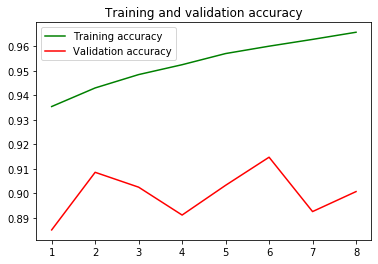

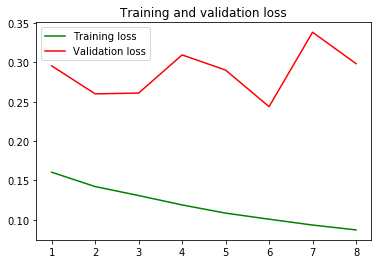

In [106]:
# Plotting the results
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [107]:
model3 = Sequential()
model3.add(embedding_layer)
model3.add(Bidirectional(GRU(60, return_sequences = True)))
model3.add(SpatialDropout1D(0.1))
model3.add(GlobalMaxPool1D())
model3.add(Dense(50,activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model3.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model3.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          27594000  
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 120)          130320    
_________________________________________________________________
spatial_dropout1d_5 (Spatial (None, 100, 120)          0         
_________________________________________________________________
global_max_pooling1d_8 (Glob (None, 120)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                6050      
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                

In [108]:
history3 = model3.fit(X_train, y_train, batch_size=64, epochs=8, validation_split=0.2, verbose=1)

Epoch 1/8
660/660 [==============================] - 59s 90ms/step - loss: 0.3162 - accuracy: 0.8615 - val_loss: 0.3423 - val_accuracy: 0.8695
Epoch 2/8
660/660 [==============================] - 60s 91ms/step - loss: 0.2552 - accuracy: 0.8910 - val_loss: 0.2681 - val_accuracy: 0.8958
Epoch 3/8
660/660 [==============================] - 59s 90ms/step - loss: 0.2251 - accuracy: 0.9058 - val_loss: 0.2783 - val_accuracy: 0.8905
Epoch 4/8
660/660 [==============================] - 63s 95ms/step - loss: 0.2015 - accuracy: 0.9168 - val_loss: 0.2599 - val_accuracy: 0.8961
Epoch 5/8
660/660 [==============================] - 64s 97ms/step - loss: 0.1771 - accuracy: 0.9274 - val_loss: 0.2515 - val_accuracy: 0.8951
Epoch 6/8
660/660 [==============================] - 63s 96ms/step - loss: 0.1584 - accuracy: 0.9352 - val_loss: 0.1904 - val_accuracy: 0.9268
Epoch 7/8
660/660 [==============================] - 63s 95ms/step - loss: 0.1394 - accuracy: 0.9443 - val_loss: 0.3796 - val_accuracy: 0.8566

In [109]:
model4 = Sequential()
model4.add(embedding_layer)
model4.add(Bidirectional(GRU(60, return_sequences = True)))
model4.add(SpatialDropout1D(0.1))
model4.add(GlobalMaxPool1D())
model4.add(Dense(50,activation='relu'))
model4.add(Dropout(0.1))
model4.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model4.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model4.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 300)          27594000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 120)          130320    
_________________________________________________________________
spatial_dropout1d_6 (Spatial (None, 100, 120)          0         
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 120)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                6050      
_________________________________________________________________
dropout_11 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [110]:
history4 = model4.fit(X_train, y_train, batch_size=64, epochs=8, validation_split=0.2, verbose=1)

Epoch 1/8
660/660 [==============================] - 58s 88ms/step - loss: 0.3165 - accuracy: 0.8603 - val_loss: 0.2944 - val_accuracy: 0.8898
Epoch 2/8
660/660 [==============================] - 56s 85ms/step - loss: 0.2509 - accuracy: 0.8934 - val_loss: 0.2830 - val_accuracy: 0.8934
Epoch 3/8
660/660 [==============================] - 57s 87ms/step - loss: 0.2243 - accuracy: 0.9063 - val_loss: 0.2119 - val_accuracy: 0.9169
Epoch 4/8
660/660 [==============================] - 57s 86ms/step - loss: 0.1986 - accuracy: 0.9185 - val_loss: 0.2050 - val_accuracy: 0.9213
Epoch 5/8
660/660 [==============================] - 63s 95ms/step - loss: 0.1801 - accuracy: 0.9256 - val_loss: 0.2309 - val_accuracy: 0.9108
Epoch 6/8
660/660 [==============================] - 60s 90ms/step - loss: 0.1563 - accuracy: 0.9370 - val_loss: 0.1813 - val_accuracy: 0.9318
Epoch 7/8
660/660 [==============================] - 59s 90ms/step - loss: 0.1405 - accuracy: 0.9425 - val_loss: 0.3246 - val_accuracy: 0.8815

In [23]:
model5 = Sequential()
model5.add(embedding_layer)
model5.add(Bidirectional(GRU(60, return_sequences = True)))
model5.add(SpatialDropout1D(0.1))
model5.add(GlobalMaxPool1D())
model5.add(Dense(1, activation='sigmoid'))

opt = Adam(learning_rate=0.001)
model5.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model5.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 300)          27594000  
_________________________________________________________________
bidirectional (Bidirectional (None, 100, 120)          130320    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 100, 120)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 121       
Total params: 27,724,441
Trainable params: 130,441
Non-trainable params: 27,594,000
_________________________________________________________________
None


In [ ]:
history5 = model5.fit(X_train, y_train, batch_size=64, epochs=8, validation_split=0.2, verbose=1)

Epoch 1/8
607/660 [==========================>...] - ETA: 10s - loss: 0.3151 - accuracy: 0.8644